In [15]:
import numpy as np
import pandas as pd
import sklearn

import pandas as pd
import ssl
import certifi
import json
# # Specify the certificate bundle
# ssl_context = ssl.create_default_context(cafile=certifi.where())

# # Use the context when reading CSV from URL

# url = r'https://www.imf.org/external/datamapper/api/v1/NGDP_RPCH'
# df = pd.read_csv(url, storage_options={'ssl_context': ssl_context})
import requests
response = requests.get('https://www.imf.org/external/datamapper/api/v1/NGDP_RPCH')
print(response.status_code)  # Should be 200
print(response.headers['Content-Type'])  # Should indicate CSV or similar



200
application/json


In [20]:
json_bytes = response.content

# Step 1: Decode bytes into a string
json_str = json_bytes.decode('utf-8')

# Step 2: Load the JSON string into a Python dictionary
data = json.loads(json_str)

# Step 3: Extract relevant data from the JSON structure
ngdp_data = data['values']['NGDP_RPCH']

# Step 4: Convert the data into pandas DataFrames
ngdp_df = pd.DataFrame.from_dict(ngdp_data, orient='index', columns=['NGDP_RPCH'])


# Step 6: Reset the index to make the years a column
df.reset_index(inplace=True)
df.rename(columns={'index': 'Year'}, inplace=True)

# Step 7: Display the DataFrame
print(df)

Empty DataFrame
Columns: [Year, Year, NGDP_RPCH]
Index: []


In [34]:
all_countries = data['values']['NGDP_RPCH'].keys()

In [37]:
all_countries_gdp = pd.DataFrame(data['values']['NGDP_RPCH'])

<AxesSubplot:>

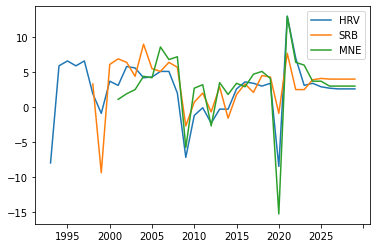

In [42]:
balkans = ['HRV', 'SRB', 'MNE']
all_countries_gdp[balkans].plot()